In [49]:
import pandas as pd
import numpy as np
import scipy as sp
import altair as alt
alt.renderers.enable('notebook')
alt.themes.enable('opaque')

alt.data_transformers.disable_max_rows()
df_train = pd.read_pickle('../data/interim/holdout_lgbm.pck')

df_train.columns

Index(['row_id', 'well_id', 'GR', 'label', 'GR_medfilt', 'GR_diff',
       'GR_shifted', 'block', 'counts', 'GR_medfilt_lag_-50',
       ...
       'GR_medfilt_corr_parabolic_dn', 'GR_medfilt_size', 'GR_medfilt_size_dp',
       'GR_medfilt_size_dn', 'label_0', 'label_1', 'label_2', 'label_3',
       'label_4', 'pred'],
      dtype='object', length=113)

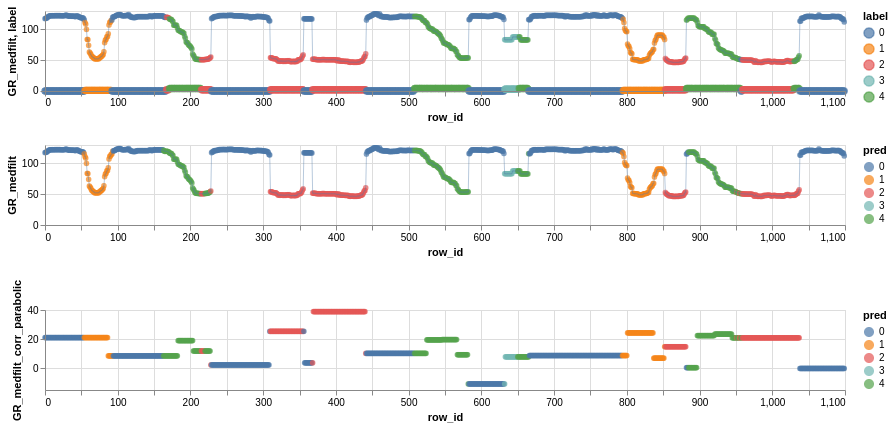

In [53]:
well_ids = 26
#well_ids = 95
#well_ids = 85 # s6ides
#well_ids  = np.random.randint(0,100,1)[0]
#well_ids = 50

df_sub = df_train[df_train['well_id'] == well_ids]
cols = df_sub.columns
ch_gr = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt',order='row_id',color='label:N').mark_point(size=30,filled=True)
ch_lab = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='label',order='row_id',color='label:N').mark_point()
ch_grp = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt',order='row_id',color='pred:N').mark_point(size=30,filled=True)
ch_grp_l = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt',order='row_id').mark_line(size=0.4)
ch_block = alt.Chart(df_sub[cols],height=80,width=800).encode(x='row_id',y='GR_medfilt_corr_parabolic',order='row_id',color='pred:N').mark_point(size=30,filled=True)

((ch_gr + ch_lab+ch_grp_l ) & (ch_grp+ch_grp_l) & ch_block  ).resolve_scale(color='independent',y='independent')

In [17]:
well_ids

21

In [17]:
well_ids

14.0

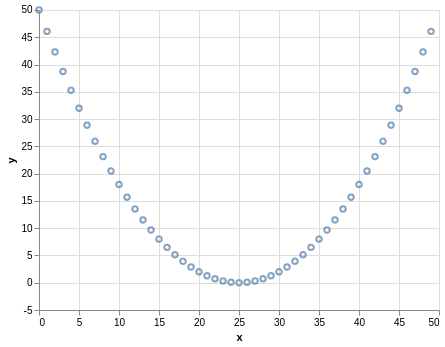

In [30]:
def make_parabolic(w,amp=50):
    x=[0,w/2,w]
    y=[amp,0,amp]
    p_coef = np.polyfit(x,y,2)
    p=np.poly1d(p_coef)
    x_new = np.arange(w)
    res = p(x_new)
    return res
    
y = make_parabolic(w=50)
tmp = pd.DataFrame({'y':y,'x':np.arange(y.shape[0])})
alt.Chart(tmp).encode(x='x',y='y').mark_point()